# Aiola Data Analyst Home Assignment

We're excited to move forward with the next step in the process for the Data Analyst position!<br><br>
The purpose of this assignment is to evaluate:<br>
 - Your technical knowledge
 - How comfortable you are translating business logic into analysis/code
 - How you approach unfamiliar data
 - Your creativity in problem-solving and ideation when faced with new challenges and projects  
 
The Customer Delivery team works closely with product management, Aiola's clients, R&D and other key stake-holders in a data-rich environment. Below you will find a real Aiola use-case and questions relating to product development, business logic, and technical implementation which represent a Data Analyst's day-to-day at Aiola.

The CSV file you have been provided with has a week's worth of advertising data. You don't need any familiarity with advertising to approach the dataset and work with it. The Delivery team works directly with companies from a wide range of industries, so we aren't look for domain expertise, just to understand how you handle data.

Please leave relevant comments and test your code as necessary, even if you are unable to solve a question. It helps us understand your skills better.

Good luck!

# Media company use case 

Aiola’s delivery team is responsible for developing the business logic and analytic capabilities of Aiola’s artificially intelligent analyst for a new client - a large media group that operates a number of TV networks and channels. Clients like the media company are considered “low-tech”, and use traditional methods for their research, analysis, and forecasting. 

Our product brings on-demand analytical capabilities into their meetings, calls and chats through their client-of-choice (WhatsApp, Slack, Teams), offering insights on their data and generating reports  – wherever they work, Aiola is available. 

The delivery team is working on the initial skill package, the first set of capabilities that the virtual analyst will provide, automating some of the media company’s data analysis processes. 

The skills that are in development use internal data from the client, the dataset has information about advertisers and their brands, and details about the advertisements they purchased. The client has also provided the delivery with team with publicly available data on other networks. 

The delivery team is working on three skills that the media company’s innovation director determined would have a significant impact on their internal users:

 - Audience penetration and frequency analysis where penetration is the percentage of product category users among the show viewers and frequency is the number of times the show viewers purchase a product of this category per month, on average, and a joint score calculation. The skill calculates and visualizes the category or categories' performance among the top scored shows' viewers. Note: the skill displays information relevant to shows which advertise the category, for example, tobacco products are not relevant to childrens shows. 
 - Category investment analysis, where a weighted investment score is calculated, comparing the investment in a particular show to investments across all programs, and a visualization of the difference between the weighted score and actual investment in the show per category.   
 - A dynamic bi-weekly snapshot generated from the client's updated data, showing investments of brands and advertisers in specific shows and across networks.  

Below you will find several questions about this use case and the example skills.

##### Who are the end-users of the product?

##### How will they use the product?  If there is more than one user-group what are the differences in how they will use it?

##### Can you suggest other features to add and modifications for the in-development features? What is the impact of each addition or modification?

Please be detailed in your response. If you suggest a feature or advanced capability that will require other datasets or sources, make a note of this in your answer and what the impact of the additional data will have on the skills.

##### Can you explain how feature modification will impact the users? 

# Coding section

##### Import libraries and packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib

##### Load in and observe data

In [3]:
df = pd.read_csv(r'anonymized_data.csv')

In [76]:
df.head()

,Year,Sector,Category,Class,Advertiser,Brand,SubBrand,Week,TimeBand,Week Day,Type,Description,Start Time {Av(Tm)},Date,Length,Time
0,2020,Sector_0,Category_0,Class_0,Advertiser_0,Brand_0,SubBrand_0,42,02:00:00 - 02:30:00,Monday,Type_0,Description_0,2:28:31,12/10/2020,0:00:10,10
1,2020,Sector_1,Category_1,Class_1,Advertiser_1,Brand_1,SubBrand_1,42,02:00:00 - 02:30:00,Monday,Type_1,Description_1,2:28:41,12/10/2020,0:00:30,30
2,2020,Sector_1,Category_1,Class_1,Advertiser_1,Brand_1,SubBrand_1,42,02:00:00 - 02:30:00,Monday,Type_1,Description_2,2:29:11,12/10/2020,0:00:30,30
3,2020,Sector_1,Category_1,Class_1,Advertiser_1,Brand_1,SubBrand_1,42,02:00:00 - 02:30:00,Monday,Type_1,Description_1,2:29:41,12/10/2020,0:00:30,30
4,2020,Sector_1,Category_1,Class_1,Advertiser_1,Brand_1,SubBrand_1,42,02:30:00 - 03:00:00,Monday,Type_1,Description_3,2:30:11,12/10/2020,0:00:30,30


##### How many advertisers are in the file?

In [5]:
print(df['Advertiser'].nunique())
# number of distinct values within the column

387


##### On average, how many brands are there per advertiser?

In [8]:
print(df.groupby(['Advertiser'])['Brand'].nunique())
# as follows

Advertiser
Advertiser_0      18
Advertiser_1       3
Advertiser_10      1
Advertiser_100     1
Advertiser_101     1
                  ..
Advertiser_95      1
Advertiser_96      1
Advertiser_97      1
Advertiser_98      1
Advertiser_99      1
Name: Brand, Length: 387, dtype: int64


##### Which brand purchased the largest number of slots?

In [9]:
x = df.groupby(['Brand']).count().reset_index()
x1 = ((x[['Brand', 'Length']]).sort_values('Length', ascending=False))
x2 = x1.rename(columns={'Length': 'Counter'})
print(x2.head(1))
# Brand_131 is the one who ordered the largest number of slots (by slots, not time)

        Brand  Counter
37  Brand_131     3596


##### Show the top purchasers of slots per week day

In [16]:
x = df.groupby(['Week Day'])['Brand'].value_counts()

x1 = x.index.get_level_values(0)
x2 = x.loc[x.groupby(x1).idxmax()]

x2

# Needed to say, it took me a while. but it truly believe it is a very important ex.

Week Day   Brand    
Friday     Brand_131    551
Monday     Brand_131    582
Saturday   Brand_0      527
Sunday     Brand_0      583
Thursday   Brand_131    675
Tuesday    Brand_131    483
Wednesday  Brand_131    437
Name: Brand, dtype: int64

##### Format the results from the previous query as following:
##### "{week _day}: {brand} purchased {number of spots}"

Example output: 

Thursday: Brand_131 purchased 675  
Sunday: Brand_0 purchased 583  
Monday: Brand_131 purchased 582  
Friday: Brand_131 purchased 551  
Saturday: Brand_0 purchased 527  

##### Find the market share of slots by brand on a specific day (for example: Monday)

In [17]:
df = pd.read_csv('/Users/tomergutkin/Downloads/anonymized_data.csv')
#x = df.groupby(['TimeBand', 'Week Day'])['TimeBand'].count() # gen number of brands per slot
#y = df.groupby(['Brand', 'TimeBand', 'Week Day'])['TimeBand'].count() # specific number of brands per slot
#x.to_frame()
#y.to_frame()

x = df[df['Week Day'] == 'Monday']['Brand'].value_counts() # Market share of slots per brand on Monday
x['Brand'] = x['Brand'] / x[‘your column of choice’].sum()*100

## to be continued


# notice - there are time frames which are not currect (such as 26, or 25 hour of the day)


SyntaxError: invalid character in identifier (<ipython-input-17-e5a5e160409a>, line 8)

##### Find the average spot time length (in "Length" column) for each spot type (column "Type") 

In [18]:
# df['Length'].apply(lambda x : x[5:8]) # seconds
# df['Length'].apply(lambda x : x[2:4]) # mins

df['Time'] = (df['Length'].apply(lambda x : int(x[5:8]))) + (df['Length'].apply(lambda x : int(x[2:4])*60))
df.groupby(['Type'])['Time'].mean()

# Damn you....

Type
Type_0      18.929140
Type_1      20.553112
Type_10      1.000000
Type_11     15.015625
Type_12     13.619048
Type_13      1.000000
Type_14      1.000000
Type_2       2.638655
Type_3     106.400000
Type_4       1.000000
Type_5       7.741279
Type_6       6.436464
Type_7      13.000000
Type_8       1.000000
Type_9      20.000000
Name: Time, dtype: float64

##### Plot (in a bar chart) the top ten brands and the share of Saturday slots they purchased

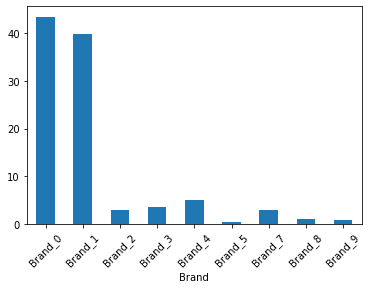

In [115]:
# Brand0 to Brand10 & and % of Sturday they purchased

df_brands = df.loc[df['Brand'].isin(['Brand_0', 'Brand_1', 'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5', 'Brand_6', 'Brand_7', 'Brand_8', 'Brand_9', ])]
df_brands = df_brands.loc[df_brands['Week Day'] == 'Saturday']
df_sat = df_brands.loc[df_brands['Week Day'] == 'Saturday']

tot_value_sat = df_sat.groupby(['Week Day'])['Time'].sum() # sum for Saturday

percent_of_sat_per_brand = df_brands.groupby(['Brand'])['Time'].sum() # sum for ea brand
x = pd.DataFrame(percent_of_sat_per_brand)
x['Percent_of_Sat'] = (x['Time'].apply(lambda x : float(x)) / float(tot_value_sat)) * 100 # note, convert both fileds
x['Percent_of_Sat'].plot(kind='bar', rot=45)


##### For the top 5 brands which purchased the most spots over the week, visualize the number of spots they purchased per day

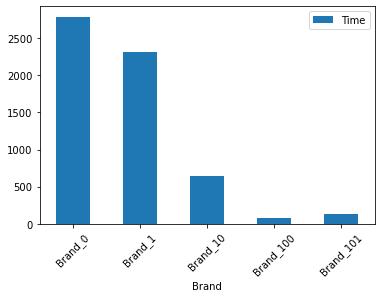

In [124]:
# brands who purchased most slots (choose only top 5)
# what is the number of spots they purchased

top_5_brands = df.groupby(['Brand'])['Time'].count() # Counting number of spots taken by Brand
top_5_brands = top_5_brands.head(5) # taking top 5 spot purchasers, segmented by brand
top_5_brands = pd.DataFrame(top_5_brands) # turning Series to DataFrame
top_5_brands.plot(kind='bar', rot=45)

# Side not, since the count was by spot and not time, I counted the equivelent to row per brand, which indicates spot


##### List the most popular time slot per Category

In [318]:
# Number of Categories per TimeBand
# Show top One for each TimeBand

df['Hour_of_Day'] = df['TimeBand'].apply(lambda x : int(x[0:2])) # Hours
df = df.loc[df['Hour_of_Day'] < 24] # getting rid of the exccesive time of the day. grow up, its sturt-up life here!
x = pd.DataFrame(df.groupby(['Category','TimeBand'])['TimeBand'].count())

x.rename(columns ={'TimeBand': 'Popularity'}, inplace = True)
y = x.sort_values(by=['Popularity'], ascending=False)
y.reset_index(inplace=True)

z = y.groupby(['TimeBand']).apply(lambda x: x.max()).reset_index(drop=True)  
z

# ASK ILANA FOR HELP CUZ FOR SOME REASSON IT DOESNT WORK

,Category,TimeBand,Popularity
0,Category_8,02:00:00 - 02:30:00,78
1,Category_1,02:30:00 - 03:00:00,212
2,Category_8,03:00:00 - 03:30:00,136
3,Category_33,03:30:00 - 04:00:00,205
4,Category_33,04:00:00 - 04:30:00,139
5,Category_34,04:30:00 - 05:00:00,137
6,Category_34,05:00:00 - 05:30:00,106
7,Category_8,05:30:00 - 06:00:00,67
8,Category_9,06:00:00 - 06:30:00,333
9,Category_9,06:30:00 - 07:00:00,371


In [2]:
df['Hour_of_Day'] = df['TimeBand'].apply(lambda x : int(x[0:2])) # mins
df = df.loc[df['Hour_of_Day'] < 24] # getting rid of the exccesive time of the day. grow up, its sturt-up life here!
x = pd.DataFrame(df.groupby(['Category','TimeBand'])['TimeBand'].count())

x.rename(columns ={'TimeBand': 'Popularity'}, inplace = True)
y = x.sort_values(by=['Popularity'], ascending=False)
y.reset_index(inplace=True)

z = y.groupby(['TimeBand']).apply(lambda x: x.max()).reset_index(drop=True)  
z

# now the task is to create a visualization using plotliy and transform that into a skill

z

NameError: name 'df' is not defined

##### Show all data available for a certain brand or advertiser

You are given the following parameters that are passed from the user interface:

 - brand_or_advertiser_selection
 - brand_or_advertiser_value
 
The parameters indicate user selections. 
 
For instance, if the parameter "brand_or_advertiser_selection" is set to "advertiser", then the user selected to get informartion about an advertiser, the brand_or_advertiser_value holds the name of the brand or advertiser to show.

Use the given parameters to show information relevant to the end-user. You may set the parameter as you see fit. 

Hint: remember to account for edge cases in your code

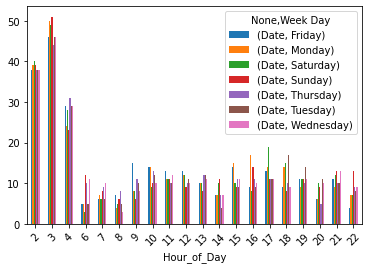

In [312]:
# given parameter from user: Advertiser
# given parameter from user: 1

# Results to show, amount of spot advertiser purchased for each week day, segmented by hours of the day

df['Hour_of_Day'] = df['TimeBand'].apply(lambda x : int(x[0:2])) # mins
df = df.loc[df['Hour_of_Day'] < 23] # getting rid of the exccesive time of the day. grow up, its sturt-up life here!
x = df.loc[df['Advertiser'] == 'Advertiser_1']
y = pd.DataFrame(x.groupby(['Advertiser', 'Week Day', 'Hour_of_Day'])['Date'].count())
y.reset_index(inplace=True)
y.pivot_table(index=["Hour_of_Day"], values=['Date'], columns=["Week Day"], aggfunc=np.sum, fill_value=0).plot(kind='bar', rot=45)


##### Take a close look at the data, can you spot any problems with it? How would you correct it?

Hint: perform univariate analysis for each column in the table to discover issues with the values

In [313]:
Yep, the hours of the day were longer then 24.

,Advertiser,Week Day,Hour_of_Day,Date
0,Advertiser_1,Friday,2,38
1,Advertiser_1,Friday,3,46
2,Advertiser_1,Friday,4,29
3,Advertiser_1,Friday,6,5
4,Advertiser_1,Friday,7,6
...,...,...,...,...
135,Advertiser_1,Wednesday,18,9
136,Advertiser_1,Wednesday,19,11
137,Advertiser_1,Wednesday,20,10
138,Advertiser_1,Wednesday,21,13
